   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.00000

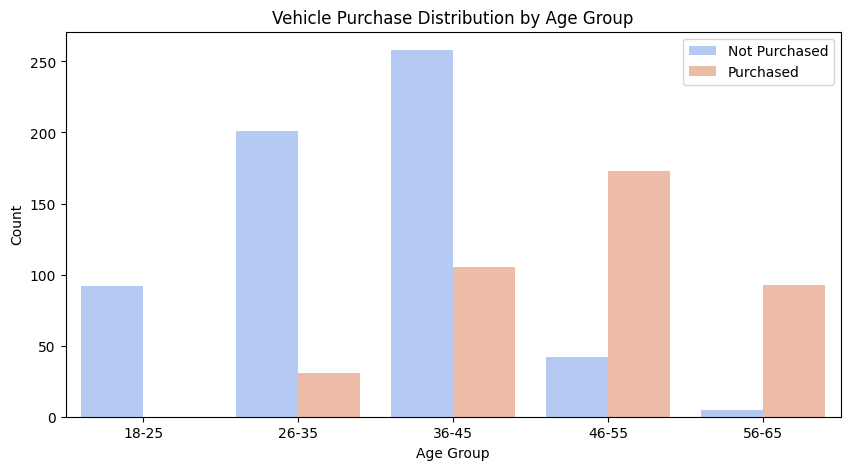

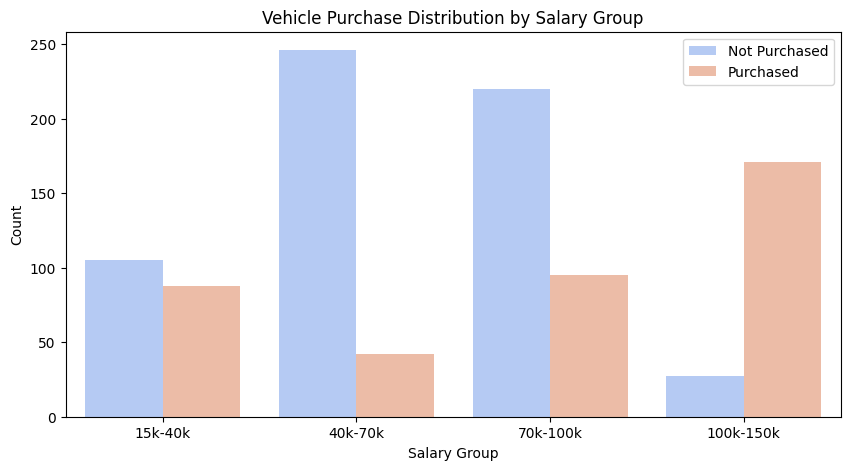

C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_17988\2311269569.py:48: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values="Purchased", index="Age Group", columns="Salary Group", aggfunc="mean")


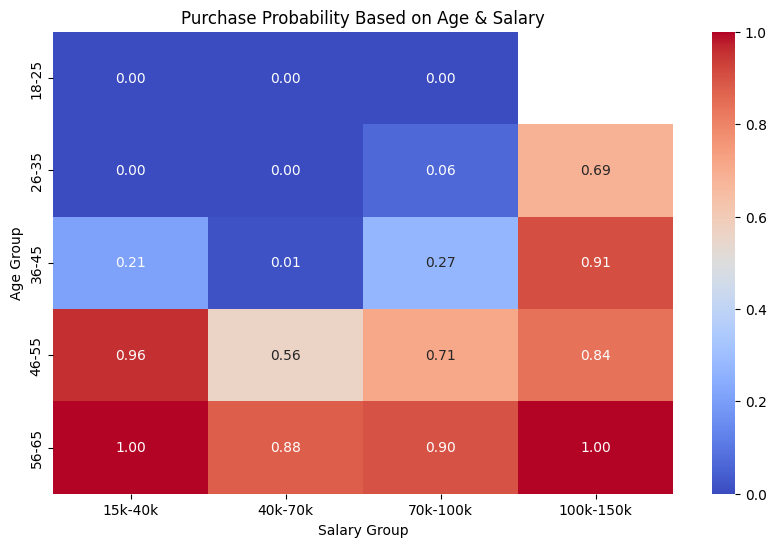

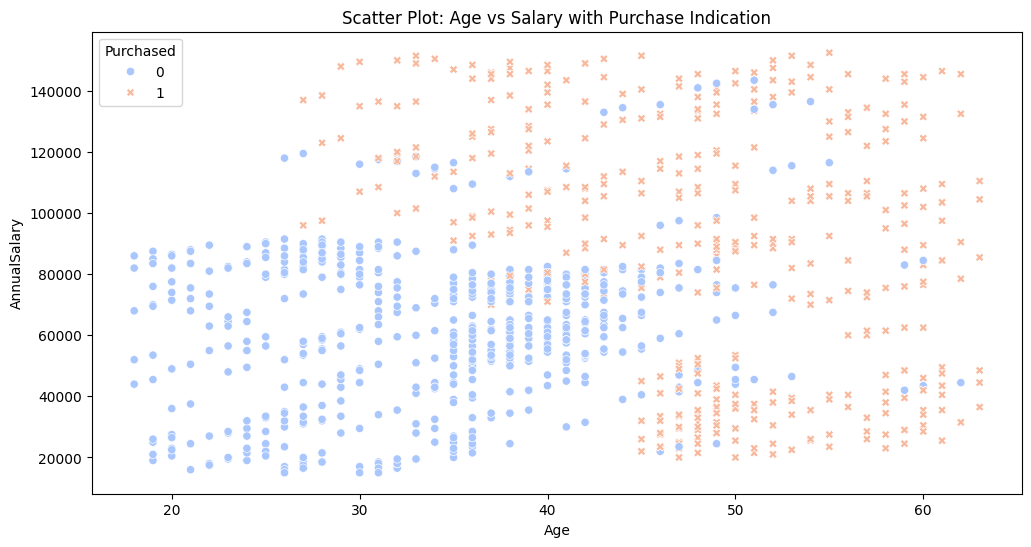

C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_17988\2311269569.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_percentage_age = df.groupby("Age Group")["Purchased"].mean() * 100
C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_17988\2311269569.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_percentage_salary = df.groupby("Salary Group")["Purchased"].mean() * 100
C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_17988\2311269569.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

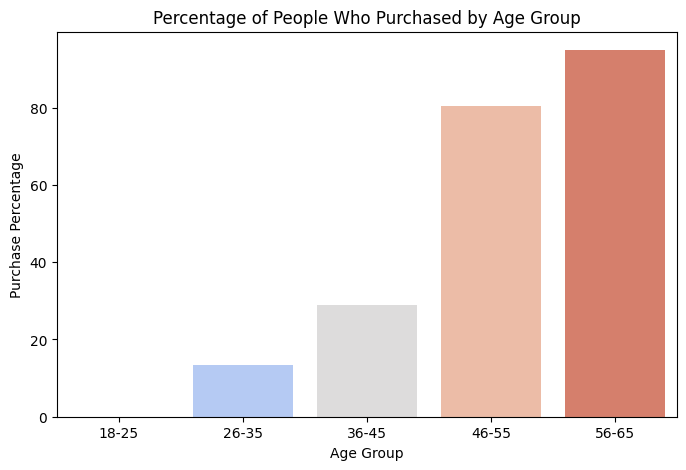

C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_17988\2311269569.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_percentage_salary.index, y=purchase_percentage_salary.values, palette="coolwarm")


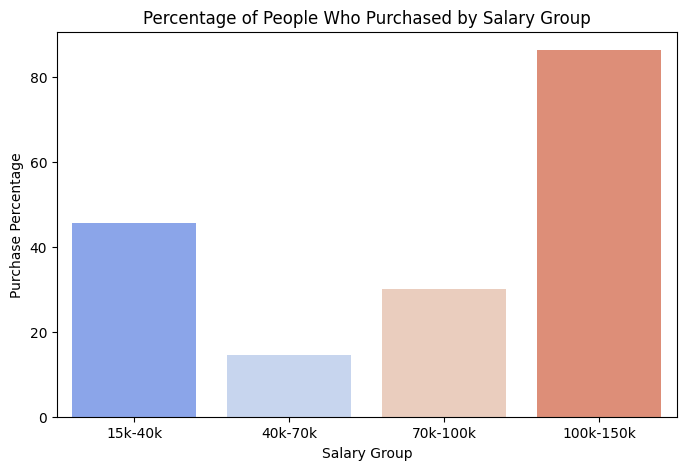


🔹 Model Performance Metrics:
Accuracy: 0.82

Confusion Matrix:
 [[104   8]
 [ 28  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       112
           1       0.88      0.68      0.77        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv(r"C:\Users\Sowmiya\Downloads\car_data.csv")

# Display basic info
print(df.head())
print(df.info())
print(df.describe())

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Define Age and Salary Groups
age_bins = [18, 25, 35, 45, 55, 65]  
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

salary_bins = [15000, 40000, 70000, 100000, 150000]  
salary_labels = ["15k-40k", "40k-70k", "70k-100k", "100k-150k"]
df["Salary Group"] = pd.cut(df["AnnualSalary"], bins=salary_bins, labels=salary_labels, include_lowest=True)

# 🔹 1. Purchase Distribution by Age & Salary
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age Group", hue="Purchased", palette="coolwarm")
plt.title("Vehicle Purchase Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["Not Purchased", "Purchased"])
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Salary Group", hue="Purchased", palette="coolwarm")
plt.title("Vehicle Purchase Distribution by Salary Group")
plt.xlabel("Salary Group")
plt.ylabel("Count")
plt.legend(["Not Purchased", "Purchased"])
plt.show()

# 🔹 2. Heatmap: How Age & Salary Together Impact Purchase
heatmap_data = df.pivot_table(values="Purchased", index="Age Group", columns="Salary Group", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Purchase Probability Based on Age & Salary")
plt.ylabel("Age Group")
plt.xlabel("Salary Group")
plt.show()

# 🔹 3. Scatter Plot: Age vs Salary with Purchase Indication
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Age", y="AnnualSalary", hue="Purchased", style="Purchased", palette="coolwarm")
plt.title("Scatter Plot: Age vs Salary with Purchase Indication")
plt.show()

# 🔹 4. Purchase Percentage by Age & Salary Groups
purchase_percentage_age = df.groupby("Age Group")["Purchased"].mean() * 100
purchase_percentage_salary = df.groupby("Salary Group")["Purchased"].mean() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=purchase_percentage_age.index, y=purchase_percentage_age.values, palette="coolwarm")
plt.title("Percentage of People Who Purchased by Age Group")
plt.ylabel("Purchase Percentage")
plt.xlabel("Age Group")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=purchase_percentage_salary.index, y=purchase_percentage_salary.values, palette="coolwarm")
plt.title("Percentage of People Who Purchased by Salary Group")
plt.ylabel("Purchase Percentage")
plt.xlabel("Salary Group")
plt.show()

# 🔹 5. Basic Predictive Model
X = df[['Age', 'AnnualSalary']]
y = df['Purchased']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\n🔹 Model Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
